In [2]:
import pandas as pd
from lshash.lshash import LSHash
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

#同q1中的数据处理方式相同
data = pd.read_csv('trade.csv')

vipno = data['vipno'].tolist()
vipno = list(set(vipno))
print(len(vipno))
pluno = data['pluno'].tolist()
pluno = list(set(pluno))
frame = pd.DataFrame(index=pluno, columns=vipno)

frame.fillna(0, inplace=True)

for index, row in data.iterrows():
        frame.at[row['pluno'],row['vipno']] = frame.at[row['pluno'],row['vipno']] + round(row['amt'])

298


In [46]:
import random
lsh = LSHash(3, 2635)
for colname, col in frame.iteritems():
    lsh.index(col.tolist(),colname)

kmeans = KMeans(n_clusters=2,n_init = 100).fit(frame.T)

kmeans_labels = kmeans.labels_
print(kmeans_labels)

#对每一个vipno计算前5个knn是否和它位于同一个聚类，如果不是同一个聚类则输出false
for x in range(298):
    k = 0
    a = lsh.query(frame.T.iloc[x].tolist(),6)

    label = kmeans.predict([list(frame.T.iloc[x])])
    for i in a[1:]:
        if(kmeans.predict([list(i[0][0])]) != label):
            print('false')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
false
false
false
false
false


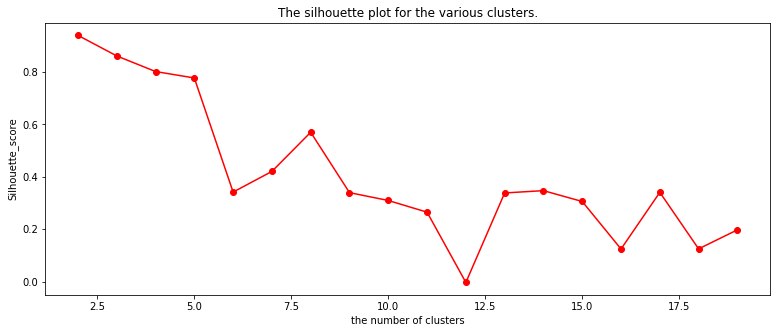

In [42]:
plt.figure(figsize=(13, 5))
x = []
y = []
n_clusters=2 
while(n_clusters < 20):
    #使用先前的处理好的dataframe调用KMeans
    kmeans_labels = KMeans(n_clusters=n_clusters).fit_predict(frame.T)
    #计算出平均轮廓系数
    silhouette_avg = silhouette_score(frame.T, kmeans_labels)
    x.append(n_clusters)
    y.append(silhouette_avg)
    n_clusters = n_clusters + 1
    
#作出图像
plt.plot(x, y, color='red', marker='o', linestyle='solid')

plt.title("The silhouette plot for the various clusters.")
plt.xlabel("the number of clusters")
plt.ylabel("Silhouette_score")
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
The average silhouette_score is : 0.9405452116338006
(298, 2635)
298


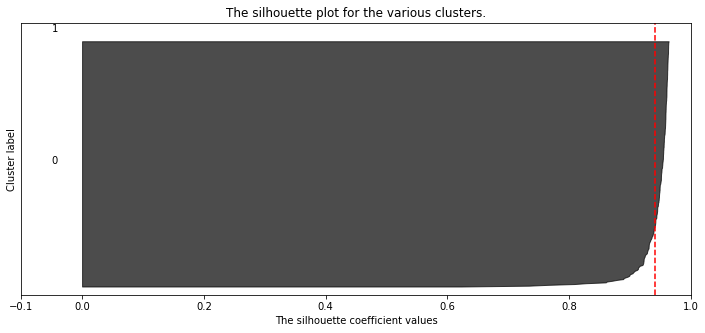

In [47]:
#做出显示聚类的分布和聚类中每个vipno轮廓系数的图
n_clusters=2
cluster_labels = KMeans(n_clusters=n_clusters).fit_predict(frame.T)
print(cluster_labels)

silhouette_avg = silhouette_score(frame.T, cluster_labels)
print("The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(frame.T, cluster_labels)

# Create a subplot with 1 row and 2 columns
fig, (ax1) = plt.subplots(1)
fig.set_size_inches(12, 5)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
print(frame.T.shape)
print(len(frame.T))
ax1.set_ylim([0, len(frame.T) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
    
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()